In [11]:
import re
import numpy as np
import string
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [12]:
stopwords = set(STOPWORDS)

sentences = """We are about to study the idea of a computational process.Computational processes are abstract beings that inhabit computers.As they evolve, processes manipulate other abstract things called data.The evolution of a process is directed by a pattern of rulescalled a program. People create programs to direct processes. In effect,we conjure the spirits of the computer with our spells."""

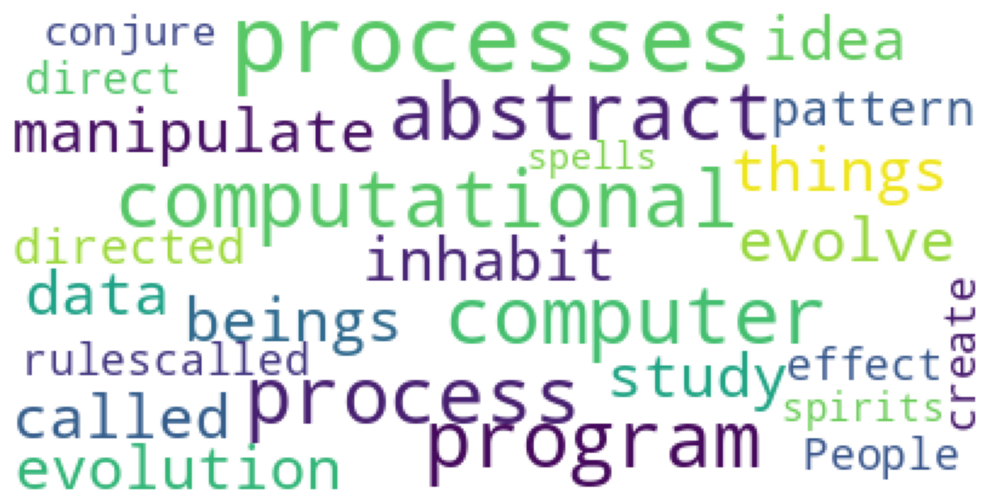

In [13]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    random_state=42
).generate(sentences)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.imshow(wordcloud)
axes.axis('off')
fig.tight_layout()

In [14]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences = sentences.lower()

words = sentences.split()
vocab = set(words)
print(words)
print(vocab)

['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'computational', 'process', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers', 'as', 'they', 'evolve', 'processes', 'manipulate', 'other', 'abstract', 'things', 'called', 'data', 'the', 'evolution', 'of', 'process', 'is', 'directed', 'by', 'pattern', 'of', 'rulescalled', 'program', 'people', 'create', 'programs', 'to', 'direct', 'processes', 'in', 'effect', 'we', 'conjure', 'the', 'spirits', 'of', 'the', 'computer', 'with', 'our', 'spells']
{'people', 'abstract', 'direct', 'conjure', 'of', 'process', 'as', 'that', 'programs', 'study', 'other', 'computer', 'to', 'they', 'with', 'create', 'spells', 'called', 'by', 'in', 'rulescalled', 'things', 'the', 'evolution', 'manipulate', 'effect', 'our', 'computers', 'beings', 'about', 'directed', 'we', 'idea', 'processes', 'data', 'computational', 'program', 'inhabit', 'pattern', 'evolve', 'spirits', 'is', 'are'}


In [15]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}
print(word_to_ix)
print(ix_to_word)

{'people': 0, 'abstract': 1, 'direct': 2, 'conjure': 3, 'of': 4, 'process': 5, 'as': 6, 'that': 7, 'programs': 8, 'study': 9, 'other': 10, 'computer': 11, 'to': 12, 'they': 13, 'with': 14, 'create': 15, 'spells': 16, 'called': 17, 'by': 18, 'in': 19, 'rulescalled': 20, 'things': 21, 'the': 22, 'evolution': 23, 'manipulate': 24, 'effect': 25, 'our': 26, 'computers': 27, 'beings': 28, 'about': 29, 'directed': 30, 'we': 31, 'idea': 32, 'processes': 33, 'data': 34, 'computational': 35, 'program': 36, 'inhabit': 37, 'pattern': 38, 'evolve': 39, 'spirits': 40, 'is': 41, 'are': 42}
{0: 'people', 1: 'abstract', 2: 'direct', 3: 'conjure', 4: 'of', 5: 'process', 6: 'as', 7: 'that', 8: 'programs', 9: 'study', 10: 'other', 11: 'computer', 12: 'to', 13: 'they', 14: 'with', 15: 'create', 16: 'spells', 17: 'called', 18: 'by', 19: 'in', 20: 'rulescalled', 21: 'things', 22: 'the', 23: 'evolution', 24: 'manipulate', 25: 'effect', 26: 'our', 27: 'computers', 28: 'beings', 29: 'about', 30: 'directed', 31:

In [16]:
data = []
for i in range(2, len(words) - 2):
  context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
  target = words[i]
  data.append((context, target))
  print(data[:5])

[(['we', 'are', 'to', 'study'], 'about')]
[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to')]
[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study')]
[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the')]
[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]
[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]
[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 

In [17]:
embeddings = np.random.random_sample((vocab_size, embed_dim))
print(embeddings)

[[0.51932498 0.90071842 0.03059554 0.81399886 0.37987116 0.44476252
  0.55793575 0.08225909 0.45461677 0.12793149]
 [0.8638567  0.7197631  0.03441835 0.99047415 0.77785143 0.60728365
  0.02140205 0.76611791 0.36706982 0.15293887]
 [0.30137049 0.17467366 0.90074474 0.88517609 0.56741938 0.03228769
  0.83674735 0.07252894 0.61827812 0.17522467]
 [0.61634877 0.87937914 0.55811922 0.19792885 0.43879669 0.41638776
  0.8542459  0.95103657 0.40519701 0.33803683]
 [0.87761608 0.98556125 0.54600329 0.68443716 0.17493121 0.02384387
  0.72497274 0.82813722 0.78758975 0.6536175 ]
 [0.66504419 0.0682611  0.58764656 0.20610794 0.21149043 0.42420218
  0.4376865  0.26096289 0.34431643 0.45400556]
 [0.4324477  0.8153475  0.77445493 0.13534097 0.79215896 0.36342258
  0.88020006 0.76230752 0.07728399 0.19020983]
 [0.19666897 0.81635781 0.15599272 0.94719583 0.58665485 0.65022861
  0.62112072 0.95088583 0.20776873 0.26885082]
 [0.95869205 0.52974611 0.52428853 0.53184354 0.1899899  0.80998902
  0.20683261